# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ahmad Alfin Nur Hakim
- **Email:** ahmadalfin130804@gmail.com
- **ID Dicoding:** ahmad_alf

## Defining business questions

- How many customers borrow bicycles most often?
- Is there a difference in bicycle usage based on the day of the week?
- How does the weather affect the number of bike rentals during peak hours of 7:00 a.m to 10:00 a.m?

## Import all libraries used

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
bike_day = pd.read_csv("drive/MyDrive/Bike dataset/day.csv")

In [68]:
bike_hour = pd.read_csv("drive/MyDrive/Bike dataset/hour.csv")

**Insight:**
- Load the dataset into the bike_day dataframe
- Load the dataset into the bike_hour dataframe

### Assessing Data

In [69]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
Here we see that the dteday column has a Dtype of object and we will replace it.

In [70]:
bike_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Find empty data

In [71]:
bike_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [72]:
duplicate_day = bike_day.duplicated().sum()
print(duplicate_day)

0


Find the duplicate data

In [73]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight**
Just like bike day steady column has dtype object

In [74]:
bike_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [75]:
duplicate_hour = bike_hour.duplicated().sum()
print(duplicate_hour)

0


In [76]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Here we are see average people who borrow bike per hour is 281 count and the maximum is 977 count
- And in the casual people who borrow average is 48 person per hour and the maximum is 367 person

### Cleaning Data

In [77]:
bike_day.dropna(axis=0, inplace=True)

In [78]:
bike_hour.dropna(axis=0,inplace=True)

**Insight:**
- Delete empty data in dataframe bike_day
- Delete empty data in dataframe bike_hour

In [79]:
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])

bike_day['weekday'] = bike_day['dteday'].dt.day_name()

bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])

**Insight**:
- Converting a dteday column to datetime
- Adding column weekday into dataframe

## Exploratory Data Analysis (EDA)

### Explore ...

In [80]:
#RFM calculation
current_date = bike_day['dteday'].max()
rfm = bike_day.groupby('casual').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'cnt': 'count',  # Frequency
}).reset_index()

peak_hours = bike_hour[(bike_hour['hr'] >= 7) & (bike_hour['hr'] <= 10)]

weather_impact = peak_hours.groupby('weathersit')['cnt'].sum().reset_index()

**Insight:**
- Perform RFM calculations to analyze people's borrowing by subtracting the days when borrowing from the current day
- Adding the total amount of borrowing into the frequency column
- In this case we do not use monetary because we do not use transactions
- Filter the bike_hour dataframe between 7-10 am and group by weather conditions and total borrowings


In [81]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency']
print(rfm)

     CustomerID  Recency  Frequency
0             2       63          1
1             9        5          2
2            15      704          1
3            25      719          1
4            34      705          1
..          ...      ...        ...
601        3155      289          1
602        3160      107          1
603        3252      268          1
604        3283      218          1
605        3410      226          1

[606 rows x 3 columns]


**Insight:**
Here we are see people who borrow twice or just one in the frequency


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [82]:
How many customers borrow bicycles most often?

Object `often` not found.


<ipython-input-88-8e5105f923de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Frequency', y='Recency', palette='husl')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

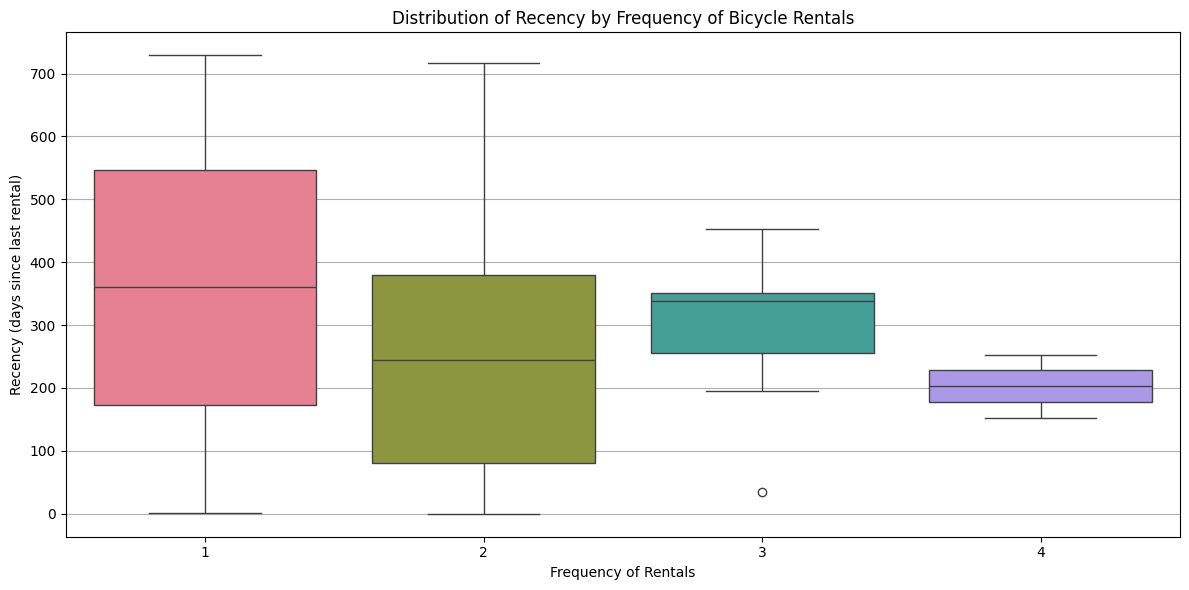

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=rfm, x='Frequency', y='Recency', palette='husl')

plt.title('Distribution of Recency by Frequency of Bicycle Rentals')
plt.xlabel('Frequency of Rentals')
plt.ylabel('Recency (days since last rental)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

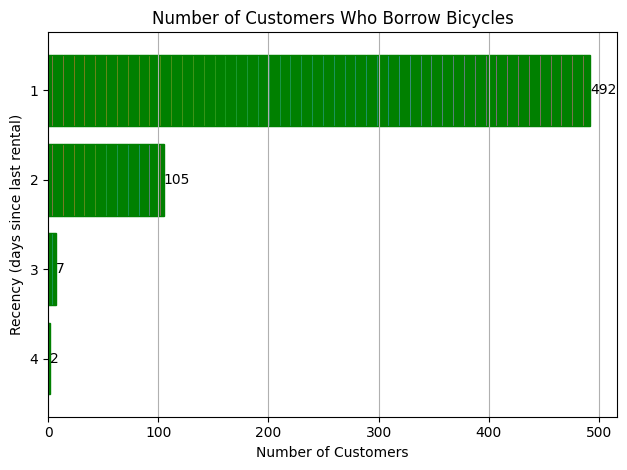

In [83]:
# Grouping data for a histogram
frequency_counts = rfm.groupby('Frequency')['Recency'].value_counts().unstack(fill_value=0)

# Creating a histogram using the Husl palette
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(frequency_counts.columns))
frequency_counts.plot(kind='barh', stacked=True, color=colors, edgecolor='green', width=0.8, legend=False)

plt.title('Number of Customers Who Borrow Bicycles')
plt.ylabel('Recency (days since last rental)')
plt.xlabel('Number of Customers')
plt.grid(axis='x')

plt.gca().invert_yaxis()

# Added annotation for number of customer
for index, value in enumerate(frequency_counts.index):
    count = frequency_counts.loc[value].sum()
    plt.text(count, index, str(count), va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Insight**:
- Most people borrow a bike only once and this can be seen from the figure, which is 492.
- This shows that people borrow in turns.

### Second question:

In [84]:
Is there a difference in bicycle usage based on the day of the week?

Object `week` not found.


<ipython-input-89-cbfd2d9c1663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='weekday', y='total_bike', data=usage_by_weekday, marker='o', palette='Set2')


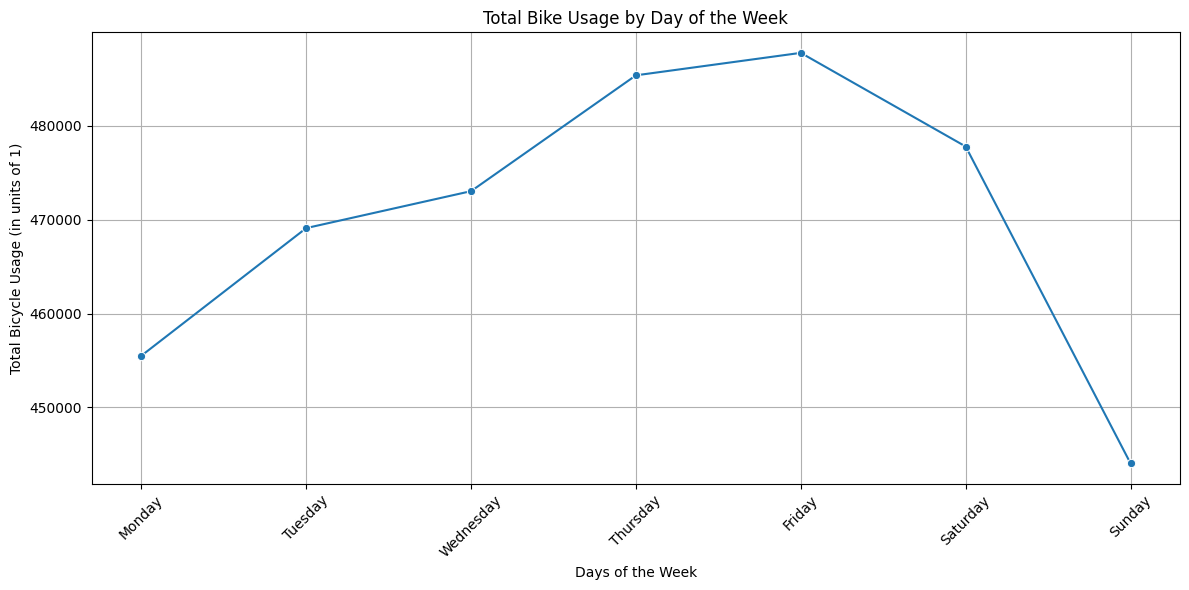

In [89]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday', y='total_bike', data=usage_by_weekday, marker='o', palette='Set2')

plt.title('Total Bike Usage by Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Total Bicycle Usage (in units of 1)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-85-b14ca0307dee>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_bike', y='weekday', data=usage_by_weekday, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

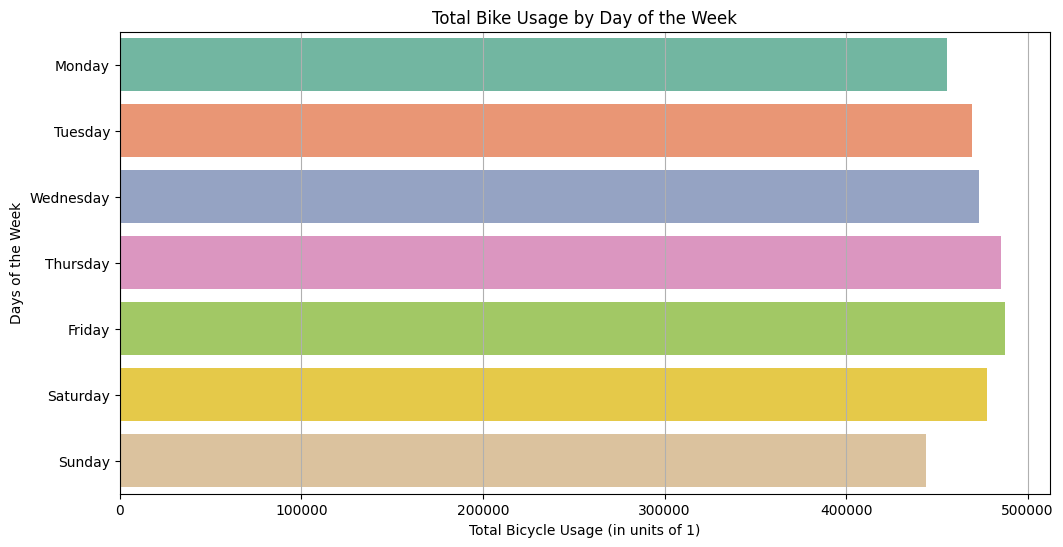

In [85]:
# Calculate total borrowing by day of the week
bike_day['total_bike'] = bike_day['casual'] + bike_day['registered']
usage_by_weekday = bike_day.groupby('weekday')['total_bike'].sum().reset_index()

# Sorting days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
usage_by_weekday['weekday'] = pd.Categorical(usage_by_weekday['weekday'], categories=ordered_days, ordered=True)
usage_by_weekday = usage_by_weekday.sort_values('weekday')

# Visualization of total bicycle usage with modified scale
plt.figure(figsize=(12, 6))
sns.barplot(x='total_bike', y='weekday', data=usage_by_weekday, palette='Set2')

plt.title('Total Bike Usage by Day of the Week')
plt.xlabel('Total Bicycle Usage (in units of 1)')
plt.ylabel('Days of the Week')
plt.grid(axis='x')
plt.show()

**Insight:**
- The highest day of borrowing is achieved by Friday and the lowest day of borrowing is achieved by Sunday.
- Holidays tend to have fewer borrowers than weekdays

### Third Question:

In [86]:
How does the weather affect the number of bike rentals during peak hours of 07:00 a.m to 10:00 a.m?

Object `a.m` not found.


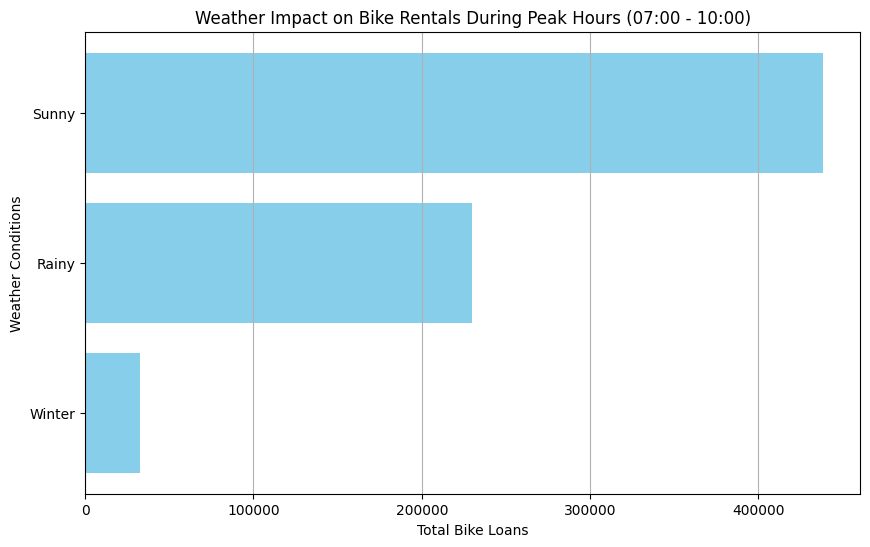

In [87]:
# Changing weathersit label to a clearer description
weather_impact['weathersit'] = weather_impact['weathersit'].replace({
    1: 'Sunny',
    2: 'Rainy',
    3: 'Winter'
})

# Sort by total borrowing from highest to lowest
weather_impact = weather_impact.sort_values(by='cnt', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(weather_impact['weathersit'], weather_impact['cnt'], color='skyblue')
plt.ylabel('Weather Conditions')
plt.xlabel('Total Bike Loans')
plt.title('Weather Impact on Bike Rentals During Peak Hours (07:00 - 10:00)')
plt.grid(axis='x')

# Set the Y axis order to match the sorted order.
plt.gca().invert_yaxis()

plt.show()

**Insight:**
- It is significantly seen that people tend to borrow when the weather conditions are sunny.
- Highest Borrowing is achieved by sunny weather, medium borrowing is achieved by rainy weather and lowest borrowing is achieved by winter.

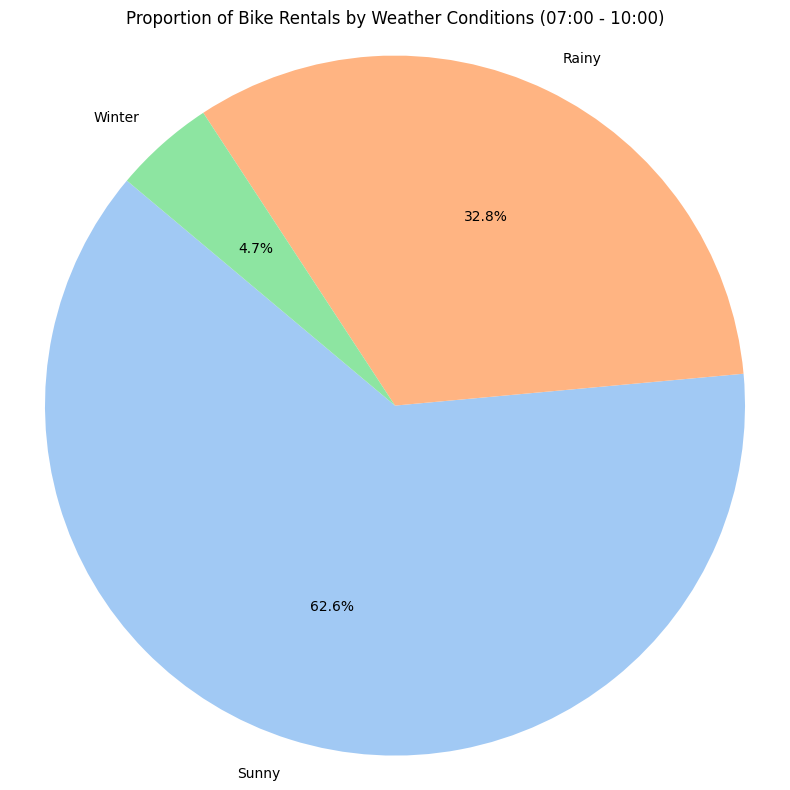

In [90]:
plt.figure(figsize=(8, 8))
plt.pie(weather_impact['cnt'], labels=weather_impact['weathersit'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title('Proportion of Bike Rentals by Weather Conditions (07:00 - 10:00)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

In [ ]:
1. The number of customers who borrow bicycles shows that most customers (492 people) have recency 1 which means they only borrow once, customers with recency 2 have (105 people), customers with recency 3 tend to be far away, namely having (7 people) and recency 4 only (2 people). This shows that customers tend to borrow alternately.
2. It can be seen that the highest usage is Friday followed by Thursday, and bicycle usage on Saturday and Sunday appears lower when compared to weekdays.
3. Sunny weather conditions have the highest number of bike rentals, indicating that customers prefer to rent bikes when the weather is good. Rainy weather conditions show a significantly lower number of bikes borrowed compared to sunny weather, but still higher than during cold weather. Cold weather conditions show the lowest number of bikes borrowed. This may be due to the uncomfortable temperature for cycling.

## Conclusion

- Most active customers only use one loan in one day since the last loan. This shows that customers are not dependent on bicycles.
- The use of bicycles on some days does not seem so steep which means that bicycles are used for daily needs such as going to work or school.
- If you want to rent, increase the number of bikes in sunny weather conditions because people prefer to ride bikes when the weather is favorable.